In [67]:
import datasets
from transformers import *
from collections import Counter

import numpy as np
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
data = []

In [22]:
task_to_keys = {
    "cola": ("sentence", None),
    "mnli": ("premise", "hypothesis"),
    "mrpc": ("sentence1", "sentence2"),
    "qnli": ("question", "sentence"),
    "qqp": ("question1", "question2"),
    "rte": ("sentence1", "sentence2"),
    "sst2": ("sentence", None),
    "stsb": ("sentence1", "sentence2"),
    "wnli": ("sentence1", "sentence2"),
}
sentence1_key, sentence2_key = task_to_keys[task_name]

In [81]:
def get_task_length(task_name):
# task_name="mrpc"
    def preprocess_function(examples):
        # Tokenize the texts
        args = (
            (examples[sentence1_key],) if sentence2_key is None else (examples[sentence1_key], examples[sentence2_key])
        )
        result = tokenizer(*args, padding=padding, max_length=max_seq_length, truncation=True)

        # Map labels to IDs (not necessary for GLUE tasks)
        if label_to_id is not None and "label" in examples:
            result["label"] = [(label_to_id.get(l, 1) if l != -1 else -1) for l in examples["label"]]
        return result
    raw_datasets = datasets.load_dataset("glue", task_name)
    sentence1_key, sentence2_key = task_to_keys[task_name]
    label_name_to_id = {k.lower(): v for k, v in model.config.label2id.items()}
    if task_name != "stsb":
        label_list = raw_datasets["train"].features["label"].names
        num_labels = len(label_list)
    else:
        num_labels = 1
    label_to_id = {i: i for i in range(2)}
    padding = "max_length"
    max_seq_length=128
    raw_datasets = raw_datasets.map(
        preprocess_function,
        batched=True,
        desc="Running tokenizer on dataset",
    )
    lengths = Counter([sum(ii["attention_mask"]) for jj in raw_datasets.values() for ii in jj])
    total = sum(lengths.values())
    res = [[task_name, ii, lengths.get(ii, 0)/total] for ii in range(129)]
    return res

In [78]:
data = []
for ii in task_to_keys.keys():
    data.extend(in_batch_get_task_length(ii))

Reusing dataset glue (/home/hjiang/.cache/huggingface/datasets/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)
Loading cached processed dataset at /home/hjiang/.cache/huggingface/datasets/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad/cache-e73e26b997a8438b.arrow
Loading cached processed dataset at /home/hjiang/.cache/huggingface/datasets/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad/cache-f3e62f2ce53bae58.arrow
Loading cached processed dataset at /home/hjiang/.cache/huggingface/datasets/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad/cache-b4c41c1dd3da080c.arrow
Reusing dataset glue (/home/hjiang/.cache/huggingface/datasets/glue/mnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Running tokenizer on dataset:   0%|          | 0/393 [00:00<?, ?ba/s]

Running tokenizer on dataset:   0%|          | 0/10 [00:00<?, ?ba/s]

Running tokenizer on dataset:   0%|          | 0/10 [00:00<?, ?ba/s]

Running tokenizer on dataset:   0%|          | 0/10 [00:00<?, ?ba/s]

Running tokenizer on dataset:   0%|          | 0/10 [00:00<?, ?ba/s]

Reusing dataset glue (/home/hjiang/.cache/huggingface/datasets/glue/mrpc/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Running tokenizer on dataset:   0%|          | 0/4 [00:00<?, ?ba/s]

Running tokenizer on dataset:   0%|          | 0/1 [00:00<?, ?ba/s]

Running tokenizer on dataset:   0%|          | 0/2 [00:00<?, ?ba/s]

Reusing dataset glue (/home/hjiang/.cache/huggingface/datasets/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Running tokenizer on dataset:   0%|          | 0/105 [00:00<?, ?ba/s]

Running tokenizer on dataset:   0%|          | 0/6 [00:00<?, ?ba/s]

Running tokenizer on dataset:   0%|          | 0/6 [00:00<?, ?ba/s]

Reusing dataset glue (/home/hjiang/.cache/huggingface/datasets/glue/qqp/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Running tokenizer on dataset:   0%|          | 0/364 [00:00<?, ?ba/s]

Running tokenizer on dataset:   0%|          | 0/41 [00:00<?, ?ba/s]

Running tokenizer on dataset:   0%|          | 0/391 [00:00<?, ?ba/s]

Reusing dataset glue (/home/hjiang/.cache/huggingface/datasets/glue/rte/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Running tokenizer on dataset:   0%|          | 0/3 [00:00<?, ?ba/s]

Running tokenizer on dataset:   0%|          | 0/1 [00:00<?, ?ba/s]

Running tokenizer on dataset:   0%|          | 0/3 [00:00<?, ?ba/s]

Reusing dataset glue (/home/hjiang/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Running tokenizer on dataset:   0%|          | 0/68 [00:00<?, ?ba/s]

Running tokenizer on dataset:   0%|          | 0/1 [00:00<?, ?ba/s]

Running tokenizer on dataset:   0%|          | 0/2 [00:00<?, ?ba/s]

Reusing dataset glue (/home/hjiang/.cache/huggingface/datasets/glue/stsb/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Running tokenizer on dataset:   0%|          | 0/6 [00:00<?, ?ba/s]

Running tokenizer on dataset:   0%|          | 0/2 [00:00<?, ?ba/s]

Running tokenizer on dataset:   0%|          | 0/2 [00:00<?, ?ba/s]

Reusing dataset glue (/home/hjiang/.cache/huggingface/datasets/glue/wnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Running tokenizer on dataset:   0%|          | 0/1 [00:00<?, ?ba/s]

Running tokenizer on dataset:   0%|          | 0/1 [00:00<?, ?ba/s]

Running tokenizer on dataset:   0%|          | 0/1 [00:00<?, ?ba/s]

<Figure size 1080x504 with 0 Axes>

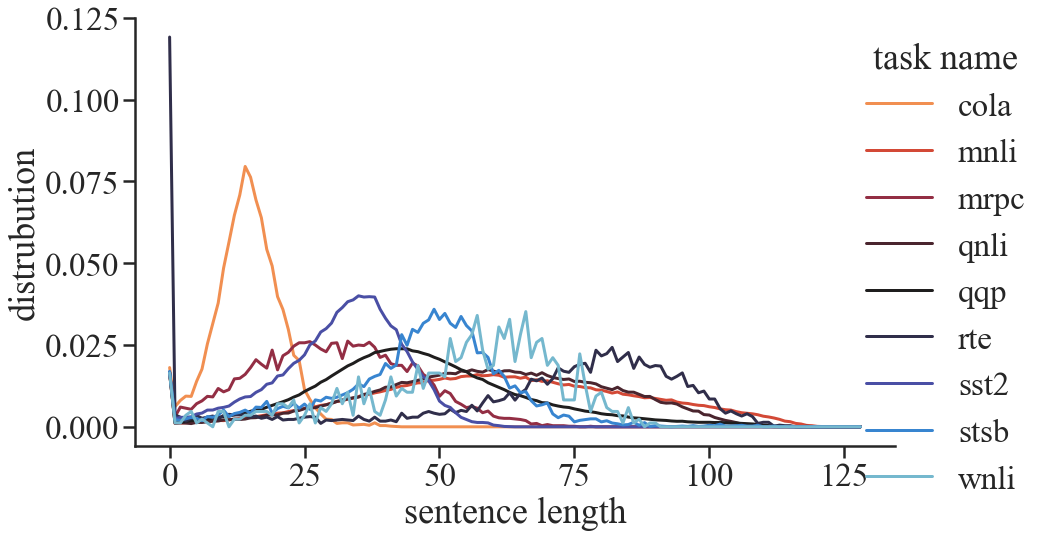

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
style = "icefire_r"

plt.figure(figsize=(15,7))
pq = pd.DataFrame(data)
pq.columns = ["task name", "sentence length", "distrubution"]
# sns.color_palette("Set2")
sns.set_theme("poster", font="Times New Roman", style="ticks",font_scale=1.5)
# sns.relplot(x="fine-tune steps", y="F1-score(%)", hue="Base-Model", kind="line", data=pq, height=15);
ax=sns.relplot(x="sentence length", y="distrubution", hue="task name",
            kind="line", data=pq, height=15,palette=style,)
# plt.ylim(67,78)
# plt.xlim(-1,11)
# plt.plot(x,y, marker="s", ms=12, markevery=[0,1])
ax.fig.set_size_inches(15,7)
# plt.legend(loc = 1, bbox_to_anchor = (0.92,0.3))
# sns.move_legend(ax, "center right",bbox_to_anchor = (0.8,0.3),frameon=False)
# ax.savefig('span_fintune_performance_inter.pdf', dpi=1000)

In [66]:
[ii for ii in data if ii[1] == 128]

[['cola', 128, 0.0],
 ['mnli', 128, 0.0030695012870608717],
 ['mrpc', 128, 0.0],
 ['qnli', 128, 0.003907702150100718],
 ['qqp', 128, 0.000274130735211087],
 ['rte', 128, 0.11895266169585574],
 ['sst2', 128, 0.0],
 ['stsb', 128, 0.0],
 ['wnli', 128, 0.0]]

In [80]:
def in_batch_get_task_length(task_name):
    def preprocess_function(examples):
        # Tokenize the texts
        args = (
            (examples[sentence1_key],) if sentence2_key is None else (examples[sentence1_key], examples[sentence2_key])
        )
        result = tokenizer(*args, padding=padding, max_length=max_seq_length, truncation=True)

        # Map labels to IDs (not necessary for GLUE tasks)
        if label_to_id is not None and "label" in examples:
            result["label"] = [(label_to_id.get(l, 1) if l != -1 else -1) for l in examples["label"]]
        return result
    raw_datasets = datasets.load_dataset("glue", task_name)
    sentence1_key, sentence2_key = task_to_keys[task_name]
    label_name_to_id = {k.lower(): v for k, v in model.config.label2id.items()}
    if task_name != "stsb":
        label_list = raw_datasets["train"].features["label"].names
        num_labels = len(label_list)
    else:
        num_labels = 1
    label_to_id = {i: i for i in range(2)}
    padding = "max_length"
    max_seq_length=128
    raw_datasets = raw_datasets.map(
        preprocess_function,
        batched=True,
        desc="Running tokenizer on dataset",
    )
    d = [ii for jj in raw_datasets.values() for ii in jj]
    np.random.shuffle(d)
    padding_gap = []
    bsz = 16
    for ii in range((len(d) - 1) // bsz + 1):
        tmp = d[ii * bsz:(ii + 1) * bsz]
        l = [sum(i["attention_mask"]) for i in tmp]
        maxz_length = max(l)
        padding_gap.extend([maxz_length - i for i in l])

    lengths = Counter(padding_gap)
    total = sum(lengths.values())
    res = [[task_name, ii, lengths.get(ii, 0)/total] for ii in range(129)]
    return res